In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

After importing all the libraries, we move on to reading the training and testing data sets.

In [95]:
train = pd.read_csv("/Users/pranayrastogi/Downloads/titanic_train.csv")
test = pd.read_csv("/Users/pranayrastogi/Downloads/titanic_test.csv")

After reading the training and testing data sets, I will start by inspecting both the datasets. The inspection would include finding the features which have missing data, the size of training and testing data sets, checking the distribution of various numerical features and so on.

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
print(train.columns)
print(test.columns)
print(train.shape)
print(test.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
(418, 11)


In [99]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we can observe from the data above, "Age" numeric feature has 177 missing values. The data also shows the distribution of the various features - their quartiles, means and standard deviation.

In [100]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Similarly, there are around 86 missing values of "Age" numeric feature in the testing dataset. Later, I will show  how can I fill in these missing values. I can also use some other functions to examine the data.

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As we can see from above,  in both the testing and training data sets, we have missing values in "Cabin" and "Age" features. And in training data set, we also have 2 missing values in Embarked feature.

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
train['Dead'] = 1 - train['Survived']
table = pd.pivot_table(train, values=['Survived','Dead'], index=['Sex'], aggfunc=[np.sum,np.mean],margins=True)
table

sum               mean          
       Dead Survived      Dead  Survived
Sex                                     
female   81      233  0.257962  0.742038
male    468      109  0.811092  0.188908
All     549      342  0.616162  0.383838

In [106]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

From the pivot table above,it is clear that "Sex" of a person will be an important feature in predicting the output. There is  a high chance that a woman will survive and less chance for a man to survive on the ship.

Now, I will start analysing the other features too, which can help determine the output label. Let us examine the "Fare" feature and see how it relates with the output label.

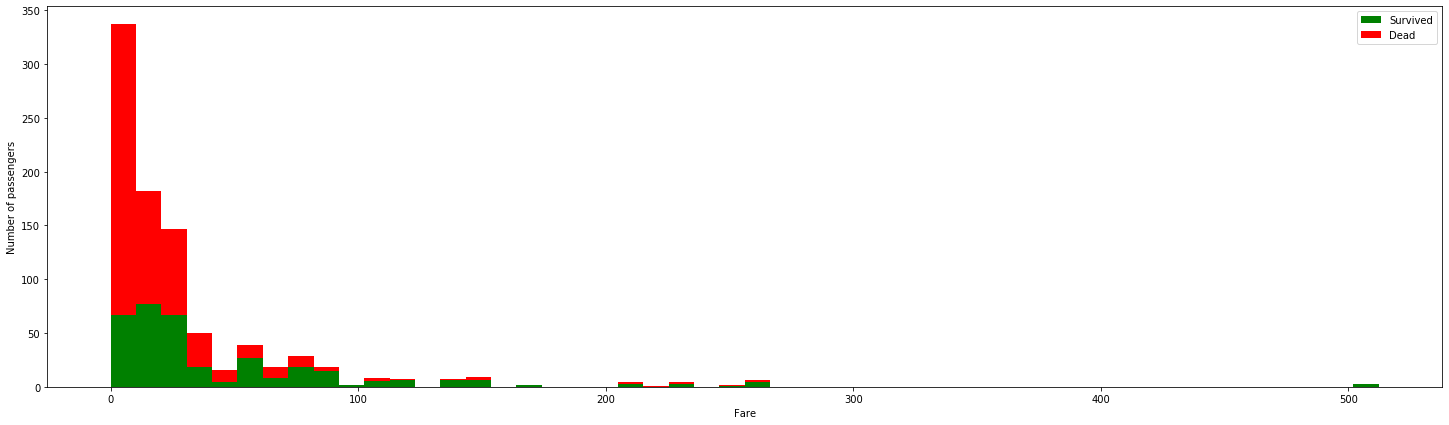

In [107]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

After checking this graph I can conclude that the person with lower fare is more likely to die than the person with higher fare.So, "Fare" is also an important feature in our dataset. Let us examine the "Pclass" feature of our data set.

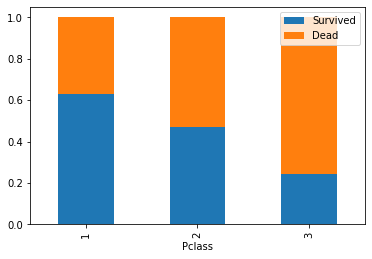

In [108]:
train.Pclass.unique()
train.groupby('Pclass').agg('mean')[['Survived','Dead']].plot(kind='bar',stacked=True)

Very clear from the graph above, a person is more likely to survive if he belongs to Pclass=1 than Pclass=3. Thus, Pclass is also an important feature in our data set. So till now, important features in our data set are : ['Sex','Fare','Pclass']
Let us start with the feature engineering part.

# Feature Engineering

In [109]:
targets = train.Survived
train.drop(['Survived'], 1, inplace=True)

In [110]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Filling in the 2 missing values in the Embarked feature with the frequently occurring class would make sense. And then I can use get_dummies() function to get three separate indicator columns for Embarked feature.

In [111]:
train['Embarked'].fillna('S',inplace=True)
embark_dummies_train = pd.get_dummies(train['Embarked'],prefix="Embarked")
train = pd.concat([train,embark_dummies_train],axis=1)
train.drop('Embarked',axis=1,inplace=True)
embark_dummies_test = pd.get_dummies(test['Embarked'],prefix="Embarked")
test = pd.concat([test,embark_dummies_test],axis=1)
test.drop('Embarked',axis=1,inplace=True)

In [112]:
#train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 34.0+ KB


In [114]:
train.drop('Dead',axis=1,inplace=True)
test['Fare'].fillna(np.mean(test['Fare']),inplace=True)

Here, we have replaced the single missing value in the Fare feature by the mean of all the values in the Fare column

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 34.0+ KB


Now I will modify the Sex feature and the Pclass feature and make them numeric features.

In [116]:
train['Sex'] = train.Sex.map({'male':1,"female":0})
test['Sex'] = test.Sex.map({'male':1,"female":0})

pclass_dummies_train = pd.get_dummies(train['Pclass'],prefix="Pclass")
train = pd.concat([train,pclass_dummies_train],axis=1)
train.drop('Pclass',axis=1,inplace=True)

pclass_dummies_test = pd.get_dummies(test['Pclass'],prefix="Pclass")
test = pd.concat([test,pclass_dummies_test],axis=1)
test.drop('Pclass',axis=1,inplace=True)

In [117]:
train.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [118]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In the case of "Cabin" feature, I will start off by extracting the first alphabet as a cabin name and for the undefined/missing values I will use another value "U" and then create binary column features for them.

In [119]:
train['Cabin'].fillna('U',inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x:x[0])
cabin_dummies_train = pd.get_dummies(train['Cabin'],prefix="Cabin")
train = pd.concat([train,cabin_dummies_train],axis=1)
train.drop('Cabin',axis=1,inplace=True)

test['Cabin'].fillna('U',inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x:x[0])
cabin_dummies_test = pd.get_dummies(test['Cabin'],prefix="Cabin")
test = pd.concat([test,cabin_dummies_test],axis=1)
test.drop('Cabin',axis=1,inplace=True)

Now I can combine the "Parch"(Parent+Chiildren) and the "SibSp"(Siblings+Spouse) features to get the total number of members within a family and decide whether this particular person will survive or not. I will move on by creating three indicator columns to check how large is the family size and what is the likelihood that such a person would survive given the family size.

In [120]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['Singleton'] = train['FamilySize'].apply(lambda s:1 if s==1 else 0)
train['SmallFamily'] = train['FamilySize'].apply(lambda s:1 if 2 <=s<=4 else 0)
train['LargeFamily'] = train['FamilySize'].apply(lambda s:1 if s>=5 else 0)

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Singleton'] = test['FamilySize'].apply(lambda s:1 if s==1 else 0)
test['SmallFamily'] = test['FamilySize'].apply(lambda s:1 if 2 <=s<=4 else 0)
test['LargeFamily'] = test['FamilySize'].apply(lambda s:1 if s>=5 else 0)

Now I will have a look at the other features - Age,Ticket and Name. Ticket feature is not giving any important information and so we can drop it. From the Name feature, I can extract the titles and create a separate feature. These titles are related to social status and hence may give some information on the survival probability.

In [121]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [122]:
titles_train = set()
for name in train['Name']:
    titles_train.add(name.split(',')[1].split('.')[0].strip())
print(len(titles_train),titles_train) 

17 {'Mlle', 'Mme', 'Mr', 'Rev', 'Ms', 'Master', 'Miss', 'Major', 'Col', 'Dr', 'Lady', 'the Countess', 'Jonkheer', 'Mrs', 'Sir', 'Don', 'Capt'}


In [123]:
titles_test = set()
for name in test['Name']:
    titles_test.add(name.split(',')[1].split('.')[0].strip())
print(len(titles_test),titles_test) 

9 {'Mr', 'Rev', 'Master', 'Miss', 'Col', 'Dr', 'Dona', 'Mrs', 'Ms'}


In [124]:
titles_test.intersection(titles_train)

{'Col', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

Now I can create a dictionary , mapping several of these titles to few relevant titles.

In [125]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train['Title'].map(Title_Dictionary)

test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Title'].map(Title_Dictionary)

title_dummies_train = pd.get_dummies(train['Title'],prefix='Title')
train = pd.concat([train,title_dummies_train],axis=1)
train.drop('Title',axis=1,inplace=True)

title_dummies_test = pd.get_dummies(test['Title'],prefix='Title')
test = pd.concat([test,title_dummies_test],axis=1)
test.drop('Title',axis=1,inplace=True)


In [126]:
train.shape

(891, 32)

In [127]:
test.shape

(418, 31)

In [128]:
train.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'FamilySize', 'Singleton',
       'SmallFamily', 'LargeFamily', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')

In [129]:
test.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_U', 'FamilySize', 'Singleton',
       'SmallFamily', 'LargeFamily', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')

In [130]:
test['Cabin_T'] = 0

Now, I can take a look at the last left feature- Age. The biggest challenge is to fill in those missing values. I just cannot use forward fill or backward fill or mean of remaining values to do that - that seems unreasonable. I can however group the data by Sex,Pclass and Title and then fill in the missing value of Age of that group by the median of the Age of that group.

In [131]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
combined.head()

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,...,Sex,SibSp,Singleton,SmallFamily,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,1,0,0,0
1,38.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,26.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,35.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,35.0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [132]:
combined.shape

(1309, 31)

In [138]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass_1', 'Pclass_2', 'Pclass_3','Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs','Title_Officer', 'Title_Royalty'])
grouped_train_median = grouped_train.median()
grouped_train_median = grouped_train_median.reset_index()[['Sex','Pclass_1', 'Pclass_2', 'Pclass_3','Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs','Title_Officer', 'Title_Royalty','Age']]
grouped_train_median

,Sex,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Age
0,0,0,0,1,0,0,0,1,0,0,31.0
1,0,0,0,1,0,1,0,0,0,0,18.0
2,0,0,1,0,0,0,0,1,0,0,31.5
3,0,0,1,0,0,1,0,0,0,0,24.0
4,0,1,0,0,0,0,0,0,0,1,40.5
5,0,1,0,0,0,0,0,0,1,0,49.0
6,0,1,0,0,0,0,0,1,0,0,40.0
7,0,1,0,0,0,1,0,0,0,0,30.0
8,1,0,0,1,0,0,1,0,0,0,26.0
9,1,0,0,1,1,0,0,0,0,0,4.0


In [140]:
def fill_age(row):
    condition = (
        (grouped_train_median['Sex'] == row['Sex']) & 
        (grouped_train_median['Title_Master'] == row['Title_Master']) & 
        (grouped_train_median['Title_Miss'] == row['Title_Miss']) &
        (grouped_train_median['Title_Mr'] == row['Title_Mr']) &
        (grouped_train_median['Title_Mrs'] == row['Title_Mrs'])&
        (grouped_train_median['Title_Officer'] == row['Title_Officer']) &
        (grouped_train_median['Title_Royalty'] == row['Title_Royalty']) &
        (grouped_train_median['Pclass_2'] == row['Pclass_2']) &
        (grouped_train_median['Pclass_1'] == row['Pclass_1']) &
        (grouped_train_median['Pclass_3'] == row['Pclass_3'])
    ) 
    return grouped_train_median[condition]['Age'].values[0]



combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

## Feature Selection and Model Fitting

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [142]:
train = combined[:891]
test = combined[891:]

In [143]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamilySize', 'Fare', 'LargeFamily', 'Name', 'Parch',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'SibSp', 'Singleton',
       'SmallFamily', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty'],
      dtype='object')

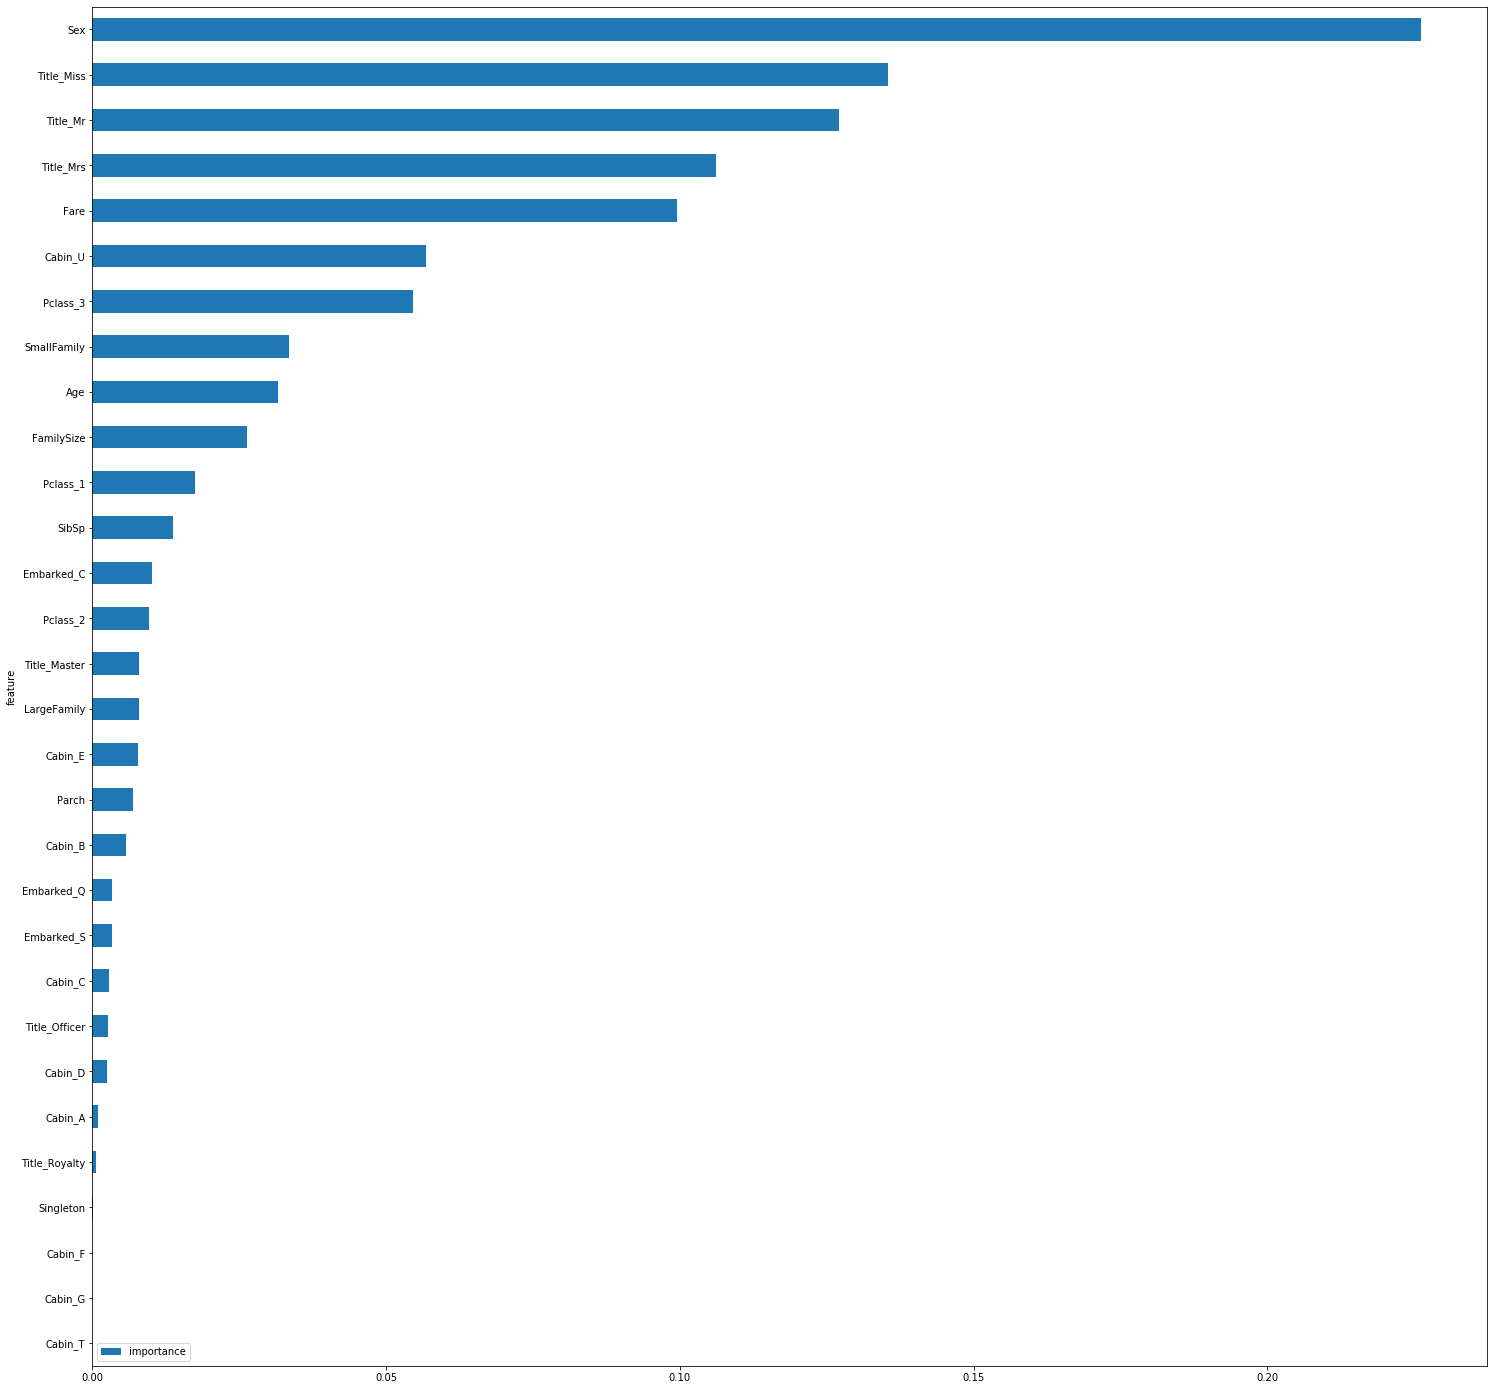

In [145]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)


clf = RandomForestClassifier(n_estimators = 30,max_depth = 3)
clf.fit(train,targets)


features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [146]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
print(test_reduced.shape)

(891, 8)
(418, 8)


## Using Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {
    'C':[1.0,2.0,5.0,10.0],
    'penalty':['l1','l2']   
}
grid = GridSearchCV(lr,param_grid,cv=5,scoring='accuracy')
grid.fit(train_reduced,targets)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 5.0, 10.0], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [149]:
grid.cv_results_

{'mean_fit_time': array([0.00750895, 0.01175046, 0.00663795, 0.00153861, 0.00696359,
        0.00154123, 0.00787935, 0.0018599 ]),
 'std_fit_time': array([2.94103679e-03, 1.96272548e-02, 3.44074071e-03, 8.90539320e-05,
        3.37506773e-03, 8.78941143e-05, 4.21932544e-03, 2.18493217e-04]),
 'mean_score_time': array([0.00057712, 0.00046835, 0.00040941, 0.00032496, 0.00038319,
        0.00029979, 0.00040908, 0.00038862]),
 'std_score_time': array([1.11019488e-04, 9.12465748e-05, 7.05745413e-05, 1.74492432e-05,
        2.19347166e-05, 6.30002768e-06, 1.15167319e-04, 7.86499493e-05]),
 'param_C': masked_array(data=[1.0, 1.0, 2.0, 2.0, 5.0, 5.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=o

In [150]:
print(grid.best_params_)
print(grid.best_index_)
print(grid.best_score_)

{'C': 1.0, 'penalty': 'l2'}
1
0.7833894500561167


## Using Random Forests

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid = {
    'n_estimators':[20,50,100,150],
    'max_depth':[2,3,4],
    'criterion':['gini','entropy']
}

grid_rf = GridSearchCV(rf,param_grid,cv=5,scoring="accuracy")
grid_rf.fit(train_reduced,targets)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [152]:
grid_rf.cv_results_

{'mean_fit_time': array([0.0136817 , 0.02893004, 0.05691676, 0.08265667, 0.01162119,
        0.02808952, 0.05885935, 0.0865664 , 0.01215072, 0.02901855,
        0.05528765, 0.08758802, 0.01173239, 0.02693014, 0.06021819,
        0.08322983, 0.0135119 , 0.02909579, 0.05921221, 0.08394341,
        0.01281595, 0.03098454, 0.0609324 , 0.08697124]),
 'std_fit_time': array([1.63569735e-03, 1.35215805e-03, 1.83262312e-03, 1.98761370e-03,
        2.57401468e-04, 2.33694238e-04, 3.54055207e-03, 3.28220174e-03,
        2.13715489e-04, 5.25409457e-04, 7.79299089e-04, 9.83739492e-03,
        3.01210730e-04, 2.58249890e-04, 4.34127508e-03, 6.58129325e-03,
        1.19571906e-03, 1.24153884e-03, 6.20936985e-03, 3.14740577e-03,
        5.87267115e-05, 5.61601015e-04, 9.79328569e-04, 1.36389961e-03]),
 'mean_score_time': array([0.00248828, 0.00336022, 0.00619025, 0.00865765, 0.00157661,
        0.00340071, 0.0066339 , 0.00946226, 0.00165439, 0.00323687,
        0.00584817, 0.00957079, 0.00165124, 0.00

In [153]:
print(grid_rf.best_index_)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

21
{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}
0.8282828282828283


## Using Gradient Boosting Classifiers

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier()
grid_params_gb = {
    'n_estimators':[50,75,100,200],
    'max_depth':[3,4,5]
}
grid_gb = GridSearchCV(gradboost,grid_params_gb,cv=5,scoring="accuracy")
grid_gb.fit(train_reduced,targets)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [155]:
print(grid_gb.best_params_)
print("-------------")
print(grid_gb.best_score_)
print("-------------")
print(grid_gb.best_index_)
print("-------------")
print(grid_gb.cv_results_)

{'max_depth': 4, 'n_estimators': 75}
-------------
0.8316498316498316
-------------
5
-------------
{'mean_fit_time': array([0.03047099, 0.04203968, 0.05366654, 0.10573835, 0.03780222,
       0.05574884, 0.07281079, 0.1394814 , 0.05004797, 0.07170396,
       0.09454718, 0.18484254]), 'std_fit_time': array([0.00304378, 0.00099913, 0.00187408, 0.00293564, 0.00091924,
       0.00125451, 0.00112874, 0.00390213, 0.00212634, 0.00087135,
       0.00151573, 0.00261069]), 'mean_score_time': array([0.00068407, 0.00071812, 0.00078011, 0.00111089, 0.00065341,
       0.00074997, 0.00086737, 0.00108347, 0.00064955, 0.0007431 ,
       0.0008594 , 0.00124102]), 'std_score_time': array([2.26321403e-05, 1.89088631e-05, 2.34000275e-05, 1.32798900e-04,
       3.40872205e-05, 3.69758239e-05, 5.74635270e-05, 6.86636567e-05,
       7.32513449e-05, 4.56145028e-05, 4.28171093e-05, 5.02972572e-05]), 'param_max_depth': masked_array(data=[3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
             mask=[False, False, False

After trying to fit the Logistic regression model, Random Forest Classifiers and Gradient Boosting Classifier, I can see that the maximum accuracy is given by the Gradient Boosting Classifier model which is 0.83164.